# Credit EDA Case Study

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the file 'application_data.csv'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Inspecting the dataframe

In [3]:
app_data.shape

(307511, 122)

In [4]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Checking % null values in the dataframe

In [5]:
#Checking null values column-wise
round(100 * app_data.isnull().sum() / app_data.shape[0],2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

Many of the columns have around or more than 50% null values. If we assume so many null values, it will skew our analysis. Therefore we will remove these columns with percentage null values more than 45%

In [6]:
#selecting columns which have less than 45% null values
app_data = app_data.loc[:,(100 * app_data.isnull().mean())<45]

Removing unwanted columns which won't have any affect on the decision by either client/company.

In [7]:
#adding the names of columns from 'EXT_Source_3' upto 'FLAG_DOCUMENT_21' to a list 'col'
col = list(app_data.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'FLAG_DOCUMENT_21'].columns)
#adding remaining unwanted columns to the list 'col'
col = col+['CODE_GENDER','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
           'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','CNT_FAM_MEMBERS',
           'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
           'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
           'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
#dropping all the column names present in col from app_data
app_data.drop(columns = col,inplace=True)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
OCCUPATION_TYPE               211120 non-n

In [8]:
#Putting 1 for 'Y' and 0 for 'N' in the columns 'FLAG_OWN_CAR' & 'FLAG_OWN_REALTY'
app_data['FLAG_OWN_CAR'] = pd.Series(np.where(app_data['FLAG_OWN_CAR'] == 'Y', 1, 0))
app_data['FLAG_OWN_REALTY'] = pd.Series(np.where(app_data['FLAG_OWN_REALTY'] == 'Y', 1, 0))

In [9]:
#Checking null values column-wise
round(100 * app_data.isnull().sum() / app_data.shape[0],2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
OCCUPATION_TYPE               31.35
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

1. We have 31.35% null values in 'OCCUPATION_TYPE' column. Assuming the null values will not be advised here as we cannot predict which client's occupation is what. Therefore better we leave the null values as it is.
2. We have 19.83% null values in 'EXT_SOURCE_3' column. This column is normalized score from external data source. As we don't know what it is and how it was obtained, predicting the null values here also might lead to exaggeration of data. So we leave the null values as it is.
3. We have 13.5% null values in 'AMT_REQ_CREDIT_BUREAU_HOUR' and all the similar columns. This column represents the number of time enquiries were made to Credit_Bureau, it indicates the possible number of loans taken by the client. When this data is not available for a client, we can safely fill them with the mean as that is what generally happening in the bank.

In [10]:
#filling null values in 'AMT_REQ_CREDIT_BUREAU_' columns with mean of the column
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mean()),inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(round(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()),inplace=True)

Checking for Invalid Values and outliers in all the columns

0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


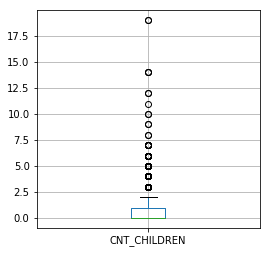

In [11]:
#finding the unique values and their counts of the column TARGET, NAME_CONTRACT_TYPE, and CNT_CHILDREN
print(app_data['TARGET'].value_counts())
print(app_data['NAME_CONTRACT_TYPE'].value_counts())
print(app_data['CNT_CHILDREN'].value_counts())
app_data.boxplot(column='CNT_CHILDREN',figsize=(4,4))

There are no invalid values/outliers in the columns 'TARGET', 'NAME_CONTRACT_TYPE'. 

We have a few outliers in 'CNT_CHILDREN' but some people also adopt children and having more number of children increases the expenses of a person and hence decreases his ability to pay the loan. Hence we will not remove the outliers in this case.

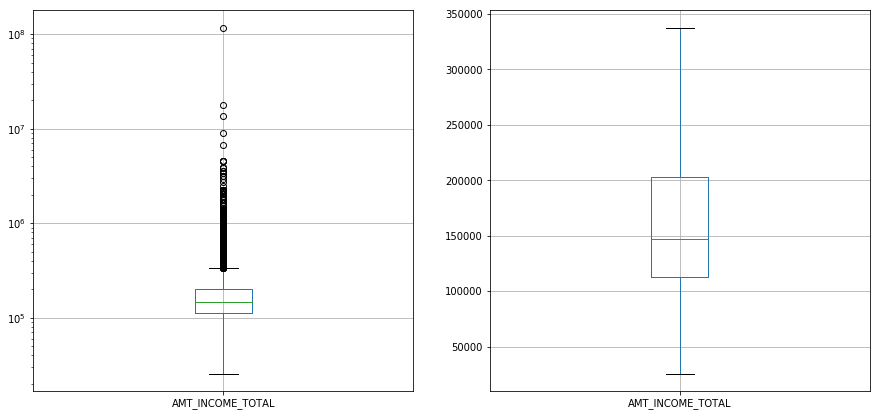

In [12]:
#Plotting boxplot for AMT_INCOME_TOTAL with and without log scale.
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
app_data.boxplot(column='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.subplot(1,2,2)
app_data.boxplot(column='AMT_INCOME_TOTAL', showfliers=False)

In [13]:
#Checking what is the occupation type of the person with highest AMT_INCOME_TOTAL
app_data.loc[app_data['AMT_INCOME_TOTAL'] == app_data['AMT_INCOME_TOTAL'].max(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
12840,117000000.0,Laborers


Clearly there are outliers in column 'AMT_INCOME_TOTAL'. As we can see from above, a laborer cannot earn an income of 117 million. Hence it is invalid value/outlier. Therefore we will remove the rows in which these outliers are present.
We will consider a value as outlier if the value is more than 3 Standard Deviation away from the median.

In [14]:
from scipy import stats
#removing the rows which are more than 3 Standard Deviation away from the mean
app_data = app_data[np.abs(stats.zscore(app_data['AMT_INCOME_TOTAL']))<3]
#Checking the remaining largest values.
app_data['AMT_INCOME_TOTAL'].nlargest(5)

15358     877500.0
172302    877500.0
172909    877500.0
262361    876276.0
110459    864900.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [15]:
#As annuity is the periodic repayments made for the loan, it cannot be greater than the credit amount. Let's check.
print((app_data['AMT_ANNUITY']>app_data['AMT_CREDIT']).sum())

0


Let's check for invalid values/outliers in 'AMT_CREDIT' and 'AMT_ANNUITY'

14852     4050000.0
17948     4050000.0
110459    4050000.0
120757    4050000.0
287732    4050000.0
Name: AMT_CREDIT, dtype: float64
17948    258025.5
15501    225000.0
20119    225000.0
23582    225000.0
32100    225000.0
Name: AMT_ANNUITY, dtype: float64


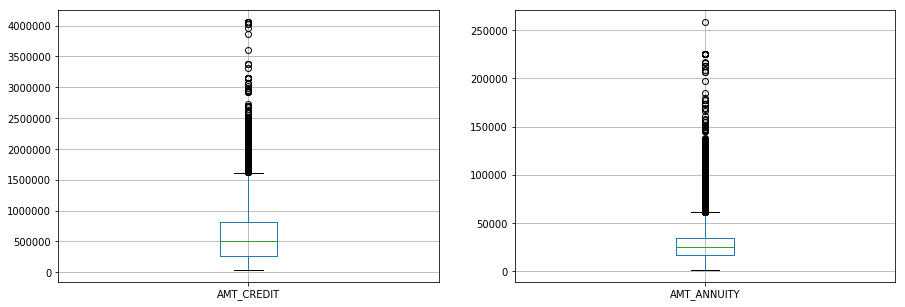

In [16]:
plt.figure(figsize=(15,5))

#Plotting box plot for column AMT_CREDIT
print(app_data['AMT_CREDIT'].nlargest(5))
plt.subplot(1,2,1)
app_data.boxplot(column='AMT_CREDIT')

#Plotting box plot for column AMT_ANNUITY
print(app_data['AMT_ANNUITY'].nlargest(5))
plt.subplot(1,2,2)
app_data.boxplot(column='AMT_ANNUITY')

In [17]:
#Printing all the rows with outliers in AMT_CREDIT(values are more than 3 Standard Deviation away from the mean)
app_data.loc[np.abs(stats.zscore(app_data['AMT_CREDIT']))>3,['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,OCCUPATION_TYPE
189,315000.000,2250000.0,83515.5,Core staff
337,247500.000,1971072.0,68643.0,Core staff
341,405000.000,2250000.0,59485.5,Core staff
441,450000.000,1971072.0,62019.0,Managers
485,450000.000,2286211.5,116266.5,Core staff
639,315000.000,1971072.0,62019.0,Accountants
667,288000.000,1971072.0,68643.0,Managers
678,54000.000,1885500.0,74191.5,NaN
748,306000.000,2085120.0,72477.0,Private service staff
871,450000.000,2125953.0,81108.0,High skill tech staff


These are mostly high income individuals asking for a big loan. We cannot remove them as we need to take them into consideration also in our analysis. Therefore we will leave the outliers in AMT_CREDIT and AMT_ANNUITY as it is.

In [18]:
#Checking for outliers in DAYS_BIRTH and DAYS_EMPLOYED
print(app_data['DAYS_BIRTH'].nlargest(5))
print(app_data['DAYS_EMPLOYED'].nlargest(5))

235444   -7489
168135   -7673
53702    -7676
170384   -7676
137182   -7678
Name: DAYS_BIRTH, dtype: int64
8     365243
11    365243
23    365243
38    365243
43    365243
Name: DAYS_EMPLOYED, dtype: int64


We don't see any invalid values in DAYS_BIRTH but there are invalid values in DAYS_EMPLOYED

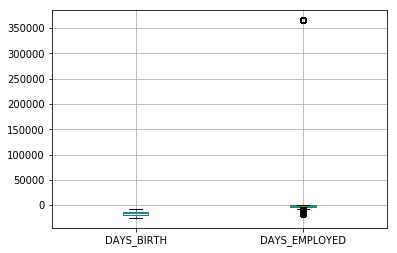

In [19]:
#Plotting a box plot to check outliers in DAYS_BIRTH and DAYS_EMPLOYED
app_data.boxplot(column=['DAYS_BIRTH','DAYS_EMPLOYED'])

As we can see there are some values in 'DAYS_EMPLOYED' column which are greater than 0. Maybe the company puts 365243 in place where no value is available. Therefore we can consider 365243 with NaN value.

In [20]:
#Replacing all the 365243 values with null values
app_data.loc[app_data['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.NaN
round(100 * app_data['DAYS_EMPLOYED'].isnull().sum()/app_data.shape[0],2)

18.03

Now we have 18% null values in DAYS_EMPLOYED column. As we cannot predict how long an employee has worked, leaving the null values as it is would be a better option.

In [21]:
#Checking column NAME_INCOME_TYPE
print(app_data['NAME_INCOME_TYPE'].value_counts())

Working                 158632
Commercial associate     71352
Pensioner                55343
State servant            21678
Unemployed                  22
Student                     18
Businessman                  7
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


In [22]:
#Checking column NAME_EDUCATION_TYPE
print(app_data['NAME_EDUCATION_TYPE'].value_counts())

Secondary / secondary special    218280
Higher education                  74542
Incomplete higher                 10262
Lower secondary                    3811
Academic degree                     162
Name: NAME_EDUCATION_TYPE, dtype: int64


In [23]:
#Checking column NAME_FAMILY_STATUS
print(app_data['NAME_FAMILY_STATUS'].value_counts())

Married                 196121
Single / not married     45370
Civil marriage           29743
Separated                19741
Widow                    16080
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


In [24]:
#Checking column NAME_HOUSING_TYPE
print(app_data['NAME_HOUSING_TYPE'].value_counts())

House / apartment      272451
With parents            14825
Municipal apartment     11171
Rented apartment         4876
Office apartment         2613
Co-op apartment          1121
Name: NAME_HOUSING_TYPE, dtype: int64


In [25]:
#Checking column OCCUPATION_TYPE
print(app_data['OCCUPATION_TYPE'].value_counts())

Laborers                 55159
Sales staff              32085
Core staff               27541
Managers                 21116
Drivers                  18596
High skill tech staff    11369
Accountants               9789
Medicine staff            8535
Security staff            6721
Cooking staff             5946
Cleaning staff            4652
Private service staff     2649
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1302
Realty agents              751
HR staff                   563
IT staff                   525
Name: OCCUPATION_TYPE, dtype: int64


In [26]:
#Checking column ORGANIZATION_TYPE
print(app_data['ORGANIZATION_TYPE'].value_counts())

Business Entity Type 3    67810
XNA                       55355
Self-employed             38361
Other                     16654
Medicine                  11182
Business Entity Type 2    10541
Government                10399
School                     8891
Trade: type 7              7817
Kindergarten               6879
Construction               6706
Business Entity Type 1     5971
Transport: type 4          5392
Trade: type 3              3488
Industry: type 9           3362
Industry: type 3           3276
Security                   3244
Housing                    2957
Industry: type 11          2698
Military                   2631
Bank                       2487
Agriculture                2452
Police                     2339
Transport: type 2          2203
Postal                     2155
Security Ministries        1971
Trade: type 2              1894
Restaurant                 1808
Services                   1573
University                 1323
Industry: type 7           1306
Transpor

We have 'XNA' values in the column 'ORGANIZATION_TYPE' which basically NaN values but is not identified as such. Therfore we need to change it to null values.

In [27]:
#Changing XNA values in ORGANIZATION_TYPE with np.NaN (null values)
app_data.loc[app_data['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.NaN
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67810
Self-employed             38361
Other                     16654
Medicine                  11182
Business Entity Type 2    10541
Government                10399
School                     8891
Trade: type 7              7817
Kindergarten               6879
Construction               6706
Business Entity Type 1     5971
Transport: type 4          5392
Trade: type 3              3488
Industry: type 9           3362
Industry: type 3           3276
Security                   3244
Housing                    2957
Industry: type 11          2698
Military                   2631
Bank                       2487
Agriculture                2452
Police                     2339
Transport: type 2          2203
Postal                     2155
Security Ministries        1971
Trade: type 2              1894
Restaurant                 1808
Services                   1573
University                 1323
Industry: type 7           1306
Transport: type 3          1187
Industry

In [28]:
round(100*app_data['ORGANIZATION_TYPE'].isnull().sum()/app_data.shape[0],2)

18.03

Therefore we have properly assigned null values to XNA values. But because of this, the percentage null values in 'ORGANIZATION_TYPE' column has increased to 18%. But we will leave it as it is because we cannot predict the organization type of an employee and we don't want to put wrong values in place of null values.

In [29]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

Checking for outliers in the EXT_SOURCE_2, EXT_SOURCE_3, and all the AMT_REQ_CREDIT_BUREAU columns

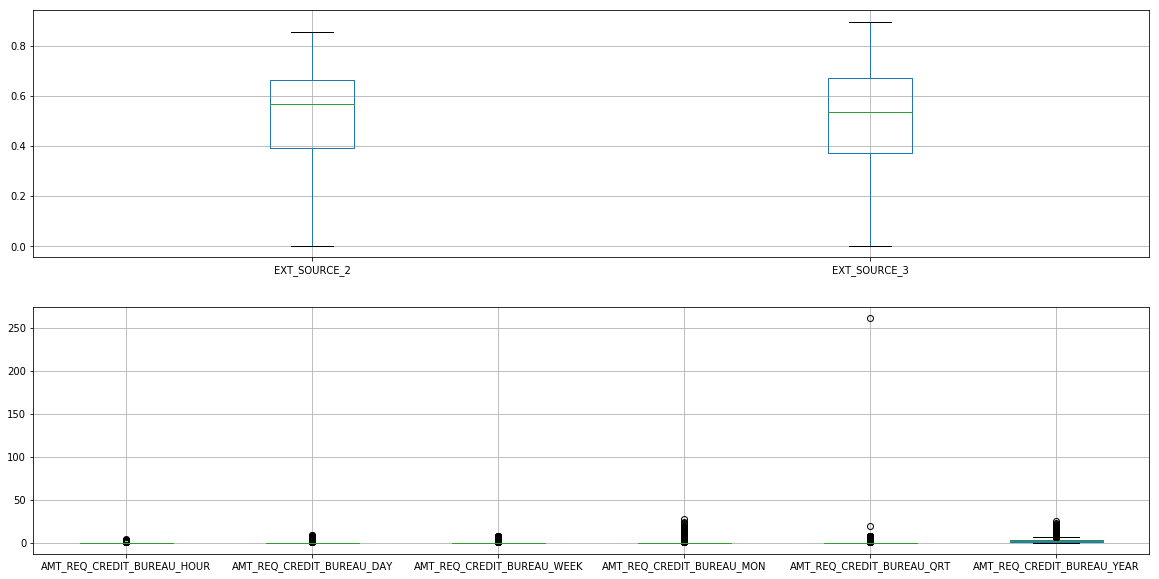

In [30]:
#Plotting box plot for EXT_SOURCE_2 and EXT_SOURCE_3
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
app_data.boxplot(column=['EXT_SOURCE_2','EXT_SOURCE_3'],labels=['EXT_SOURCE_2','EXT_SOURCE_3'])

#Plotting box plot for all the AMT_REQ_CREDIT_BUREAU_ columns
plt.subplot(2,1,2)
app_data.boxplot(column=['AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR'])

'AMT_REQ_CREDIT_BUREAU_QRT' has one outlier. So lets remove that.

In [31]:
#Finding the maximum value in AMT_REQ_CREDIT_BUREAU_QRT adnd removing it from app_data
maximum = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].max()
app_data = app_data.loc[app_data['AMT_REQ_CREDIT_BUREAU_QRT'] != maximum]
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].max()

19.0

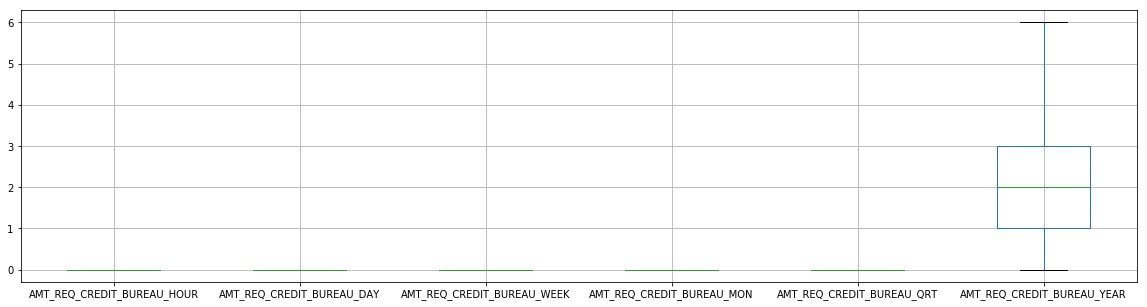

In [32]:
#Plotting box plot for all the AMT_REQ_CREDIT_BUREAU_ columns
plt.figure(figsize=(20,5))
app_data.boxplot(column=['AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR'],showfliers=False)

As the mean of all the AMT_REQ_CREDIT_BUREAU columns, except Year, is 0, we can just create one common column AMT_REQ_CREDIT_BUREAU where we add all the values of AMT_REQ_CREDIT_BUREAU columns (Hour, Day, Week, Mon, QRT and Year) for each row and put them in this newly created AMT_REQ_CREDIT_BUREAU column.

In [33]:
#Creating 'AMT_REQ_CREDIT_BUREAU' column
app_data['AMT_REQ_CREDIT_BUREAU'] = app_data.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].sum(1)
#Dropping all the previous AMT_REQ_CREDIT_BUREAU columns
app_data.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], inplace=True)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU
0,100002,1,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637.0,Laborers,Business Entity Type 3,0.262949,0.139376,1.0
1,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188.0,Core staff,School,0.622246,NaN,0.0
2,100004,0,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225.0,Laborers,Government,0.555912,0.729567,0.0
3,100006,0,Cash loans,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039.0,Laborers,Business Entity Type 3,0.650442,NaN,2.0
4,100007,0,Cash loans,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038.0,Core staff,Religion,0.322738,NaN,0.0


Now we have taken care of null values, invalid values/outliers.

Checking whether all the columns have proper datatypes

In [34]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307056 entries, 0 to 307510
Data columns (total 21 columns):
SK_ID_CURR               307056 non-null int64
TARGET                   307056 non-null int64
NAME_CONTRACT_TYPE       307056 non-null object
FLAG_OWN_CAR             307056 non-null int32
FLAG_OWN_REALTY          307056 non-null int32
CNT_CHILDREN             307056 non-null int64
AMT_INCOME_TOTAL         307056 non-null float64
AMT_CREDIT               307056 non-null float64
AMT_ANNUITY              307044 non-null float64
AMT_GOODS_PRICE          306778 non-null float64
NAME_INCOME_TYPE         307056 non-null object
NAME_EDUCATION_TYPE      307056 non-null object
NAME_FAMILY_STATUS       307056 non-null object
NAME_HOUSING_TYPE        307056 non-null object
DAYS_BIRTH               307056 non-null int64
DAYS_EMPLOYED            251701 non-null float64
OCCUPATION_TYPE          210739 non-null object
ORGANIZATION_TYPE        251701 non-null object
EXT_SOURCE_2             3

All the columns have proper datatypes.

Deriving a new column 'Age_Group' from 'DAYS_BIRTH' by binning the age in brackets of 10 years.
Similarly, deriving new column 'Employee_Since(years)' from 'DAYS_EMPLOYED'

In [35]:
#Creating AGE_GROUP by dividing DAYS_BIRTH with 365 and then again dividing it by 10
app_data['Age_Group'] = (app_data['DAYS_BIRTH']/(-3650)).astype(int)
#Creating Employee_Since(years) by diving DAYS_EMPLOYED with 365
app_data['Employee_Since(years)'] = round(app_data['DAYS_EMPLOYED']/(-365))
#Removing the 'DAYS_BIRTH' and 'DAYS_EMPLOYED' columns from app_data
app_data.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED'], inplace=True)

We can create another column INCOME_LEVEL which will take values LOW, MEDIUM, HIGH based on the values of AMT_INCOME_TOTAL. We can use this to identify which income level clients has higher default rate on the loan.

In [36]:
#We are categorizing total income of clients into LOW, MID and HIGH where LOW < 100000 < MID < 250000 < HIGH
app_data['INCOME_LEVEL'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins=[app_data['AMT_INCOME_TOTAL'].min(),100000,
                                                                      250000,app_data['AMT_INCOME_TOTAL'].max()],
                            labels=['LOW','MID','HIGH'])

In [37]:
app_data['INCOME_LEVEL'].value_counts()

MID     204035
LOW      63696
HIGH     39323
Name: INCOME_LEVEL, dtype: int64

# Checking for Imbalance in data

In [38]:
#Finding percentage rows in the 'application_data' where TARGET = 0
round(100 * app_data.loc[app_data['TARGET']==0].shape[0]/app_data.shape[0],2)
#Finding percentage rows in the 'application_data' where TARGET = 1
round(100 * app_data.loc[app_data['TARGET']==1].shape[0]/app_data.shape[0],2)
#Ratio of number of rows where TARGET=0 and TARGET=1
app_data.loc[app_data['TARGET']==0].shape[0]/app_data.loc[app_data['TARGET']==1].shape[0]

11.38079109713318

Therefore there are 11 times more data where TARGET=0 than TARGET=1

Therefore lets divide the data into 2 sets. app_target0 and app_target1.

In [39]:
app_target0 = app_data.loc[app_data['TARGET'] == 0]
app_target1 = app_data.loc[app_data['TARGET'] == 1]

# Univariate Analysis of Numerical Variables

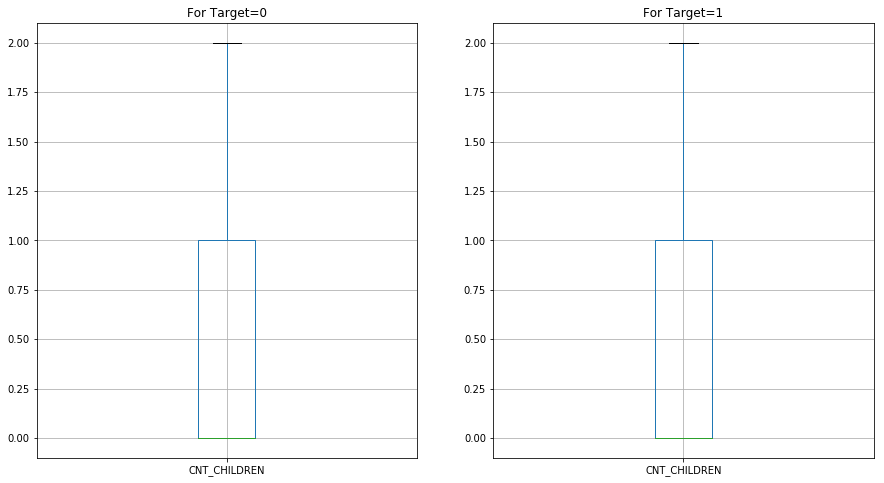

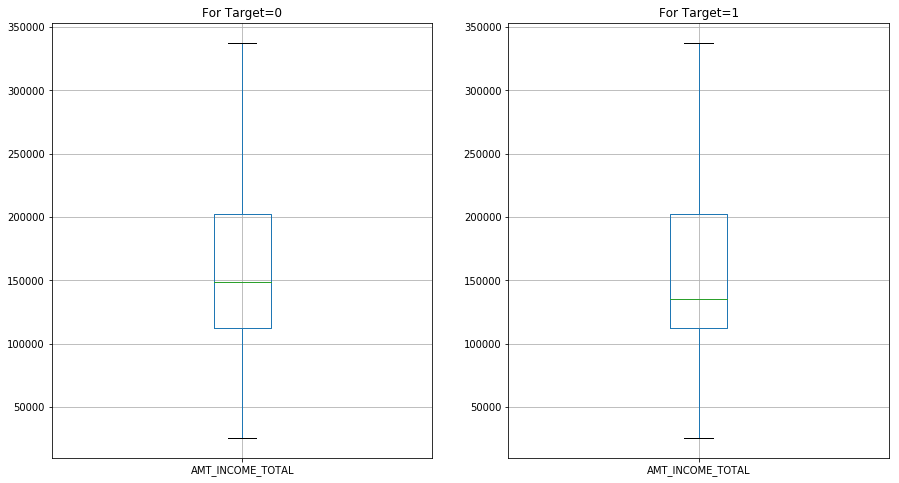

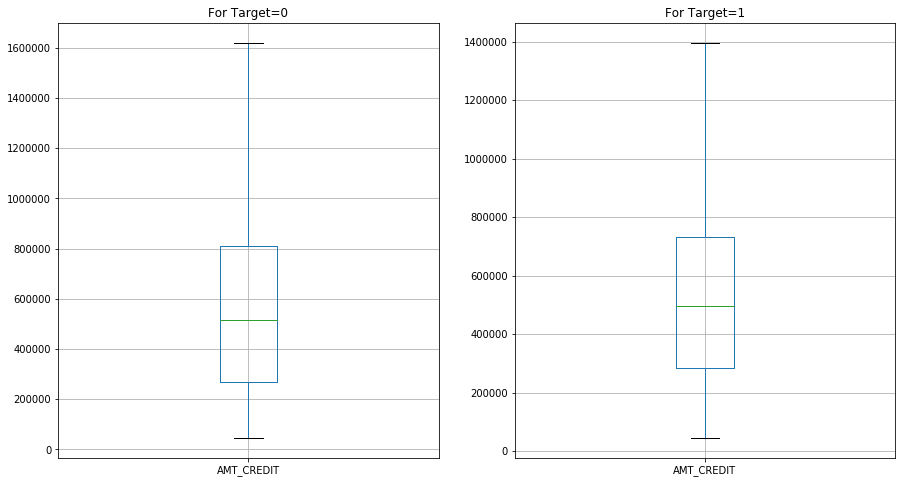

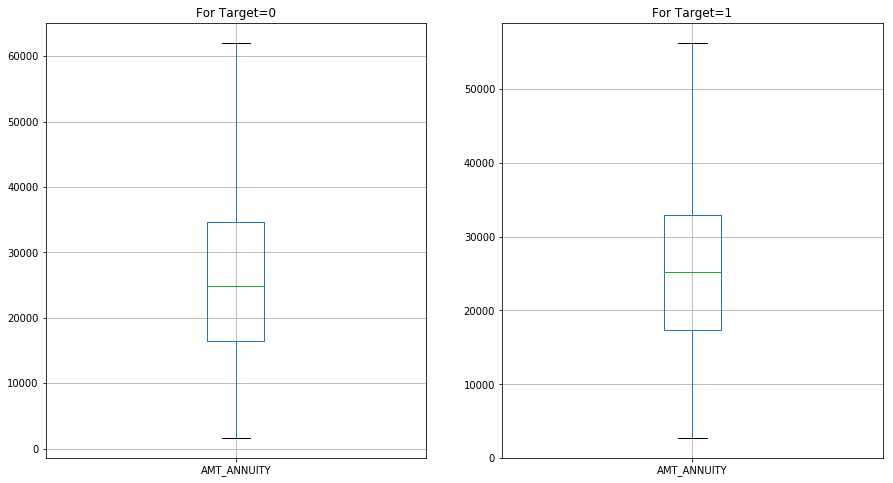

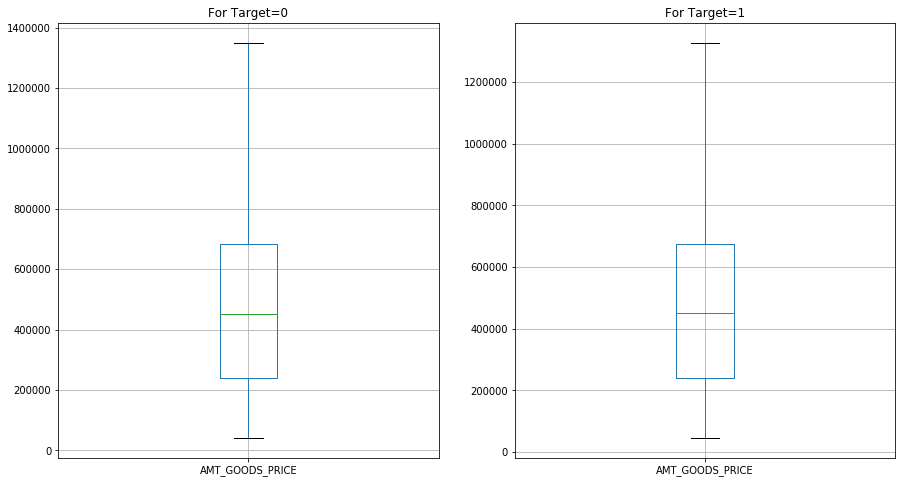

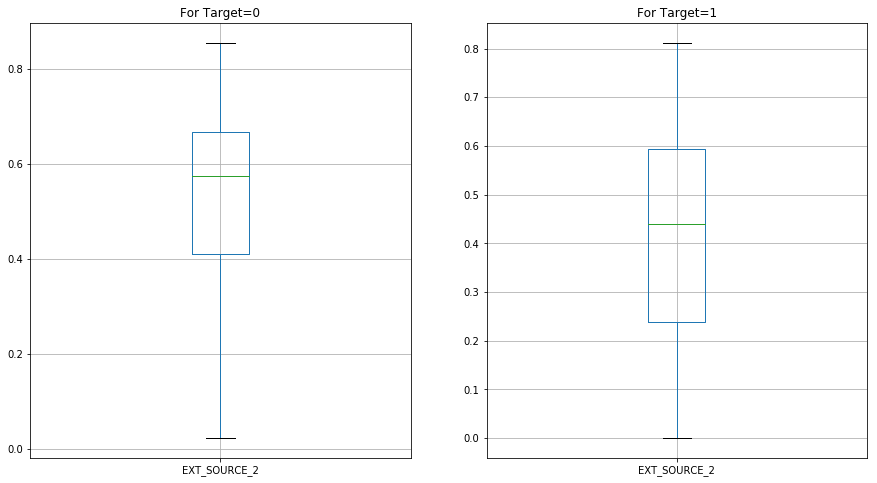

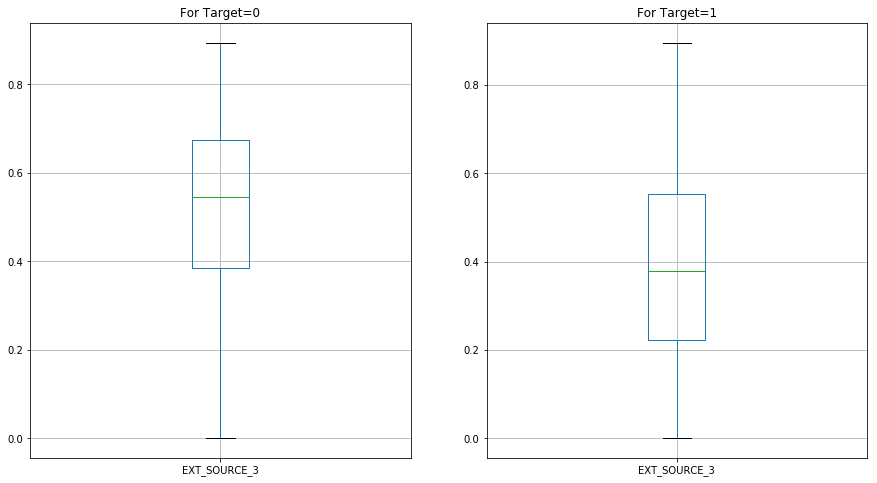

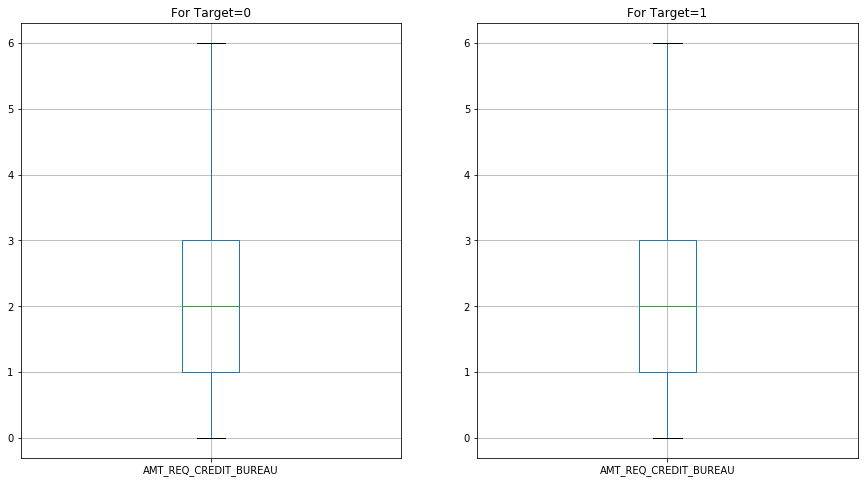

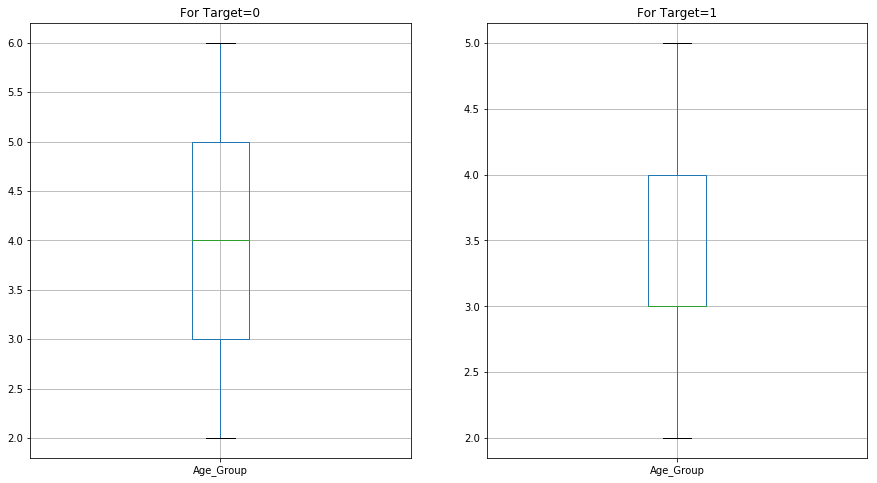

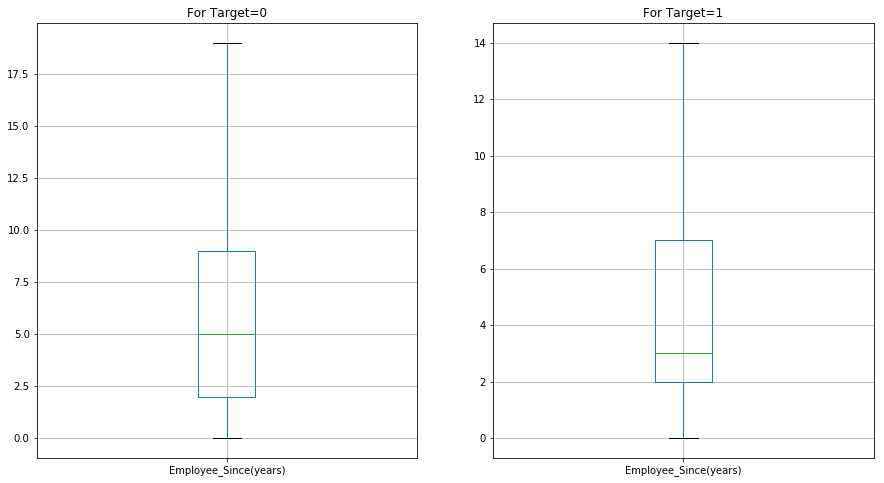

In [40]:
#creating a list where all the numerical columns are mentioned
col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2',
       'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU', 'Age_Group',
       'Employee_Since(years)']

#plotting boxplots of the numerical variables.
#LHS boxplot for variables of Target=0 and RHS boxplot for variables of Target=1
for i in col:
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    app_target0.boxplot(column=i,showfliers=False)
    plt.title('For Target=0')
    plt.subplot(1,2,2)
    app_target1.boxplot(column=i,showfliers=False)
    plt.title('For Target=1')

Target=0 are the non defaulters and Target=1 are the defaulters.
1. CNT_CHILDREN doesn't have any variation with Target=0 and Target=1
2. Variation of non-defaulters is same as defaulters but the median of total income of non-defaulters is higher.
3. Credit requested by clients has higher variation for non-defaulters.
4. The annuity amount, Goods_price and times requested to credit bureau is about the same as for both type of clients.
5. EXT_Source_2 score is better for non-defaulters and they also have lower variation.
Similarly EXT_Source_3 score is also better for non-defaulters.
6. Age_group median for non-defaulters is 4. It means that the median of age of non-defaulters are in there 40s. It is 3 for defaulters.
7. Also, the median number of years of experience of non-defautlers is 5 years while it is about 3 for defaulters.

Univariate Analysis of Categorical Variables

Text(0.5, 1.0, 'Age_Group for Target=1')

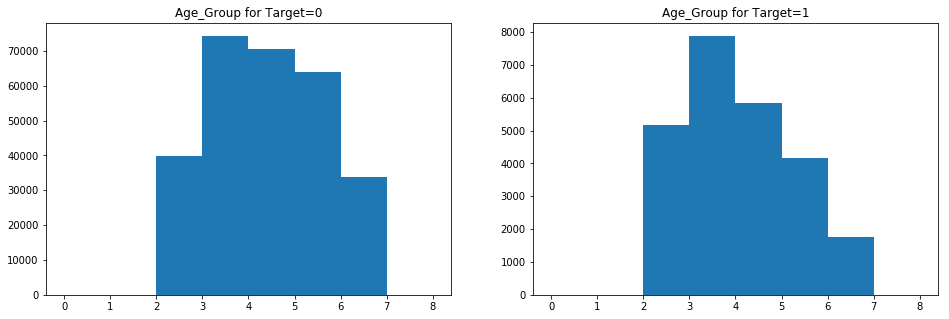

In [41]:
#Plotting histogram for categorical variables Age_Group and Employee_Since(years)
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
plt.hist(app_target0['Age_Group'],bins=[0,1,2,3,4,5,6,7,8])
plt.title('Age_Group for Target=0')

plt.subplot(1,2,2)
plt.hist(app_target1['Age_Group'],bins=[0,1,2,3,4,5,6,7,8],label='Age_Group for Target=1')
plt.title('Age_Group for Target=1')

Therefore the highest number of clients with payment difficulties are in their 30s, 40s and 20s. But as the number of clients with no payment difficulties are also in about the same age group. We cannot predict anything yet.

Text(0.5, 1.0, 'Employee_Since for Target=1')

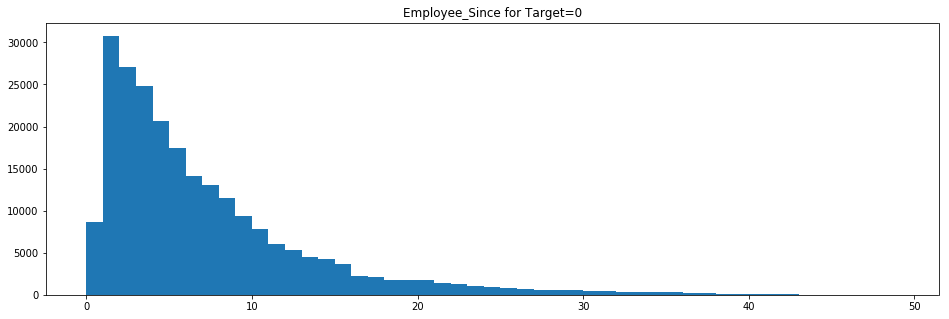

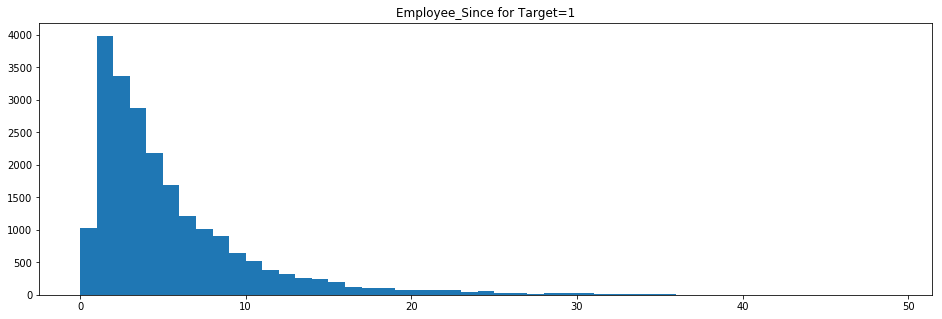

In [42]:
#Plotting histogram for Employee_Since(years) column
plt.figure(figsize = (16,5))
plt.hist(app_target0['Employee_Since(years)'],bins=list(range(0,50)))
plt.title('Employee_Since for Target=0')

plt.figure(figsize = (16,5))
plt.hist(app_target1['Employee_Since(years)'],bins=list(range(0,50)))
plt.title('Employee_Since for Target=1')

Similarly with Employee_Since. As the number of years of experience for both clients with and without payment difficulties are similar, we cannot predict anything with this univariate analysis yet.

# Segmented Univariate Analysis

Text(0.5, 1.0, 'For Target=1')

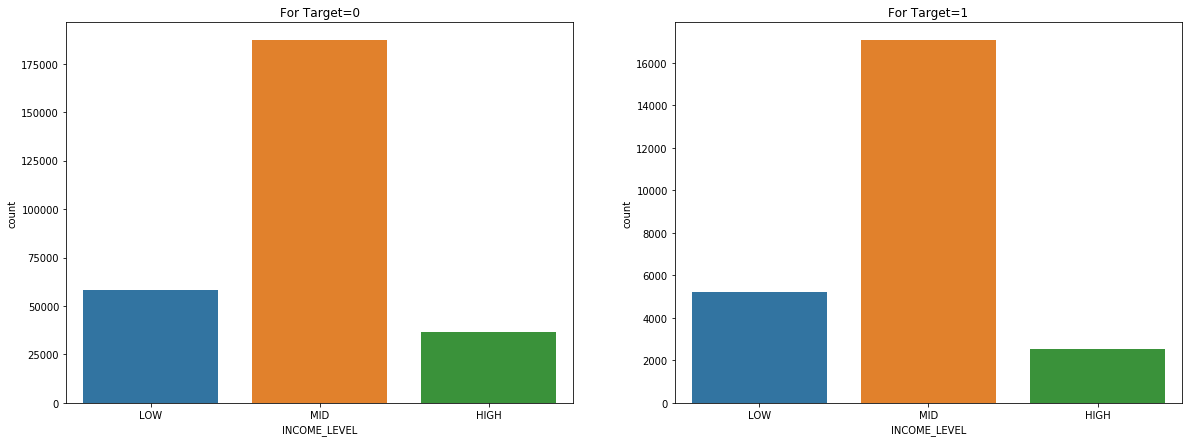

In [43]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(x = 'INCOME_LEVEL', data = app_target0)
plt.title('For Target=0')
plt.subplot(1,2,2)
sns.countplot(x = 'INCOME_LEVEL', data = app_target1)
plt.title('For Target=1')

Cannot see difference in defaulters and non defaulters in income level categories too.

Text(0.5, 1.0, 'NAME_EDUCATION_TYPE for Target=1')

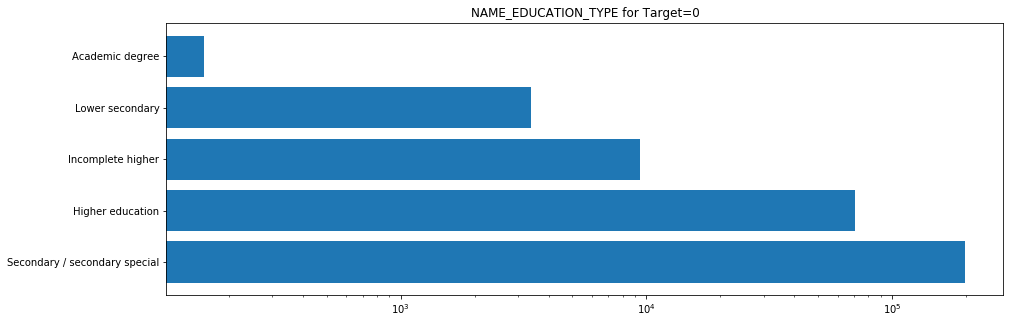

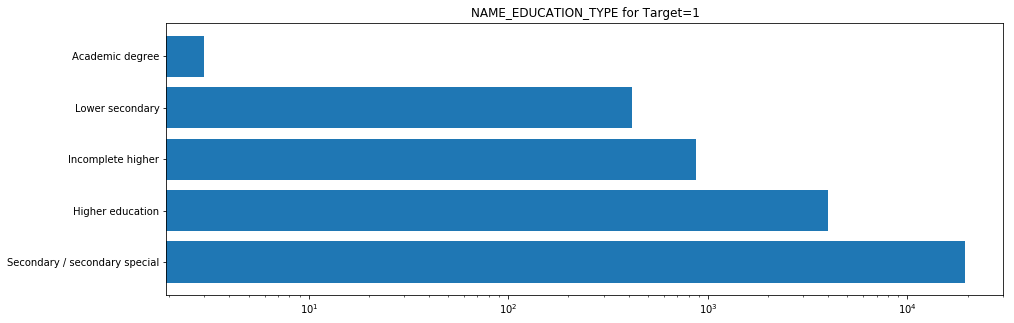

In [44]:
#Plotting a bar graph for NAME_EDUCATION_TYPE column
plt.figure(figsize=(15,5))
plt.barh(y = app_target0['NAME_EDUCATION_TYPE'].value_counts().index,width=app_target0['NAME_EDUCATION_TYPE'].value_counts())
plt.xscale('log')
plt.title('NAME_EDUCATION_TYPE for Target=0')

plt.figure(figsize=(15,5))
plt.barh(y = app_target1['NAME_EDUCATION_TYPE'].value_counts().index,width=app_target1['NAME_EDUCATION_TYPE'].value_counts())
plt.xscale('log')
plt.title('NAME_EDUCATION_TYPE for Target=1')

Again, the % number of clients with various levels of education are same for both client with and without payment difficulties.

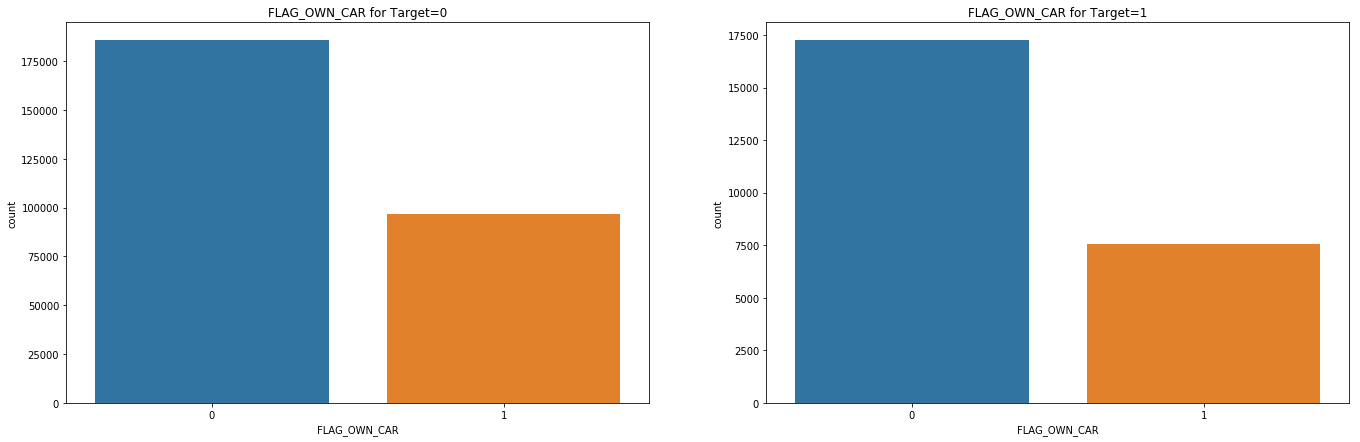

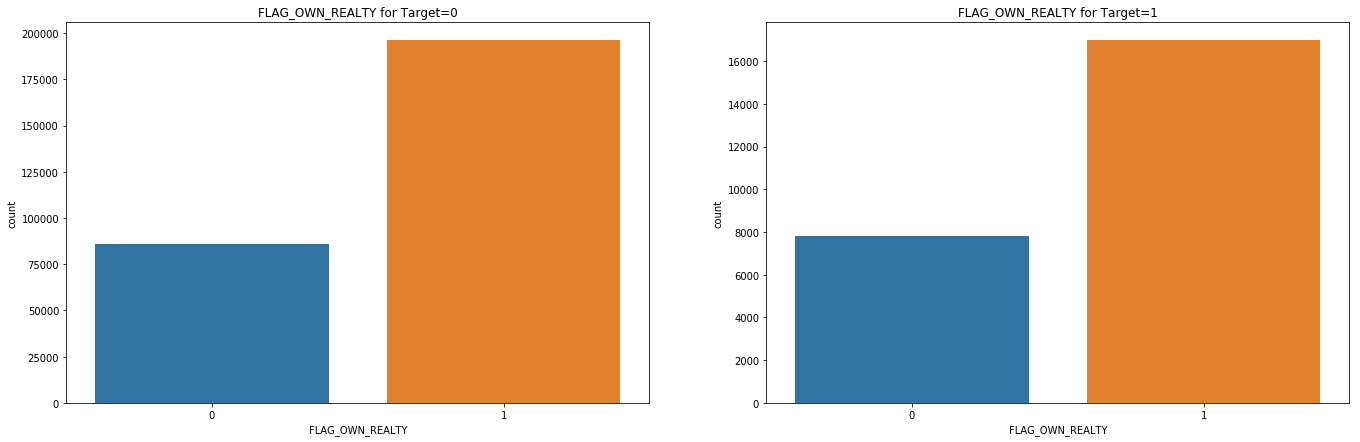

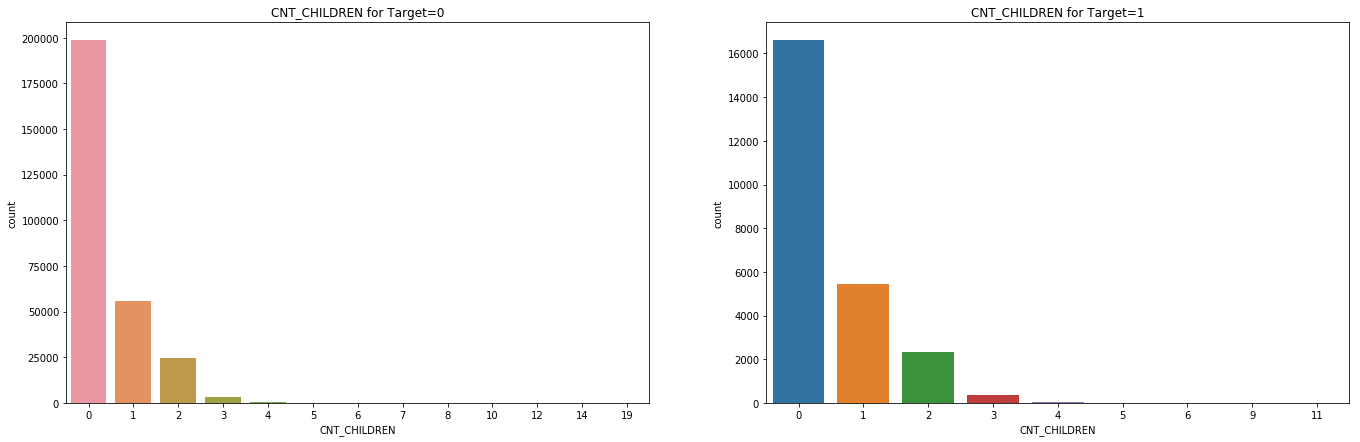

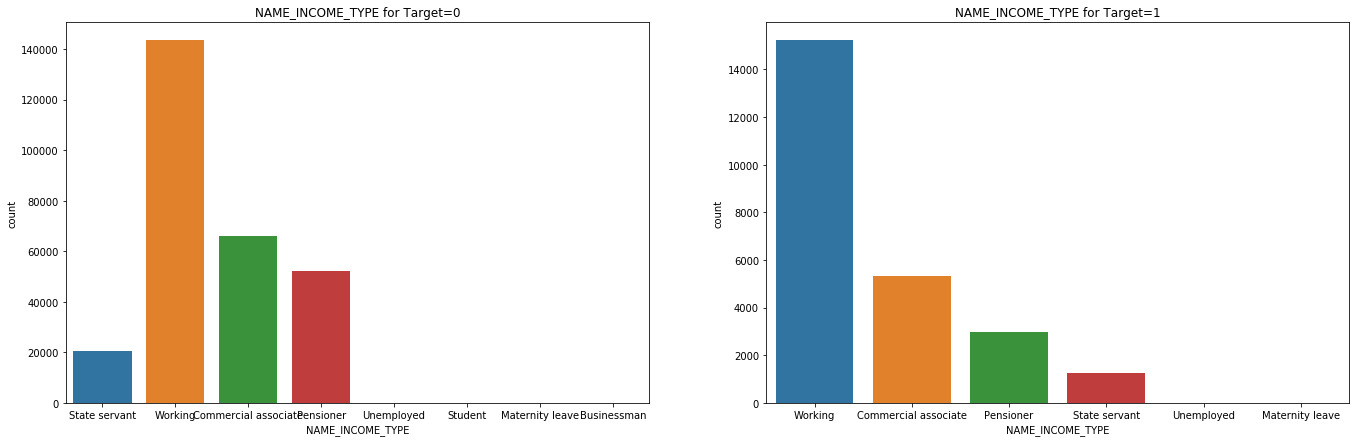

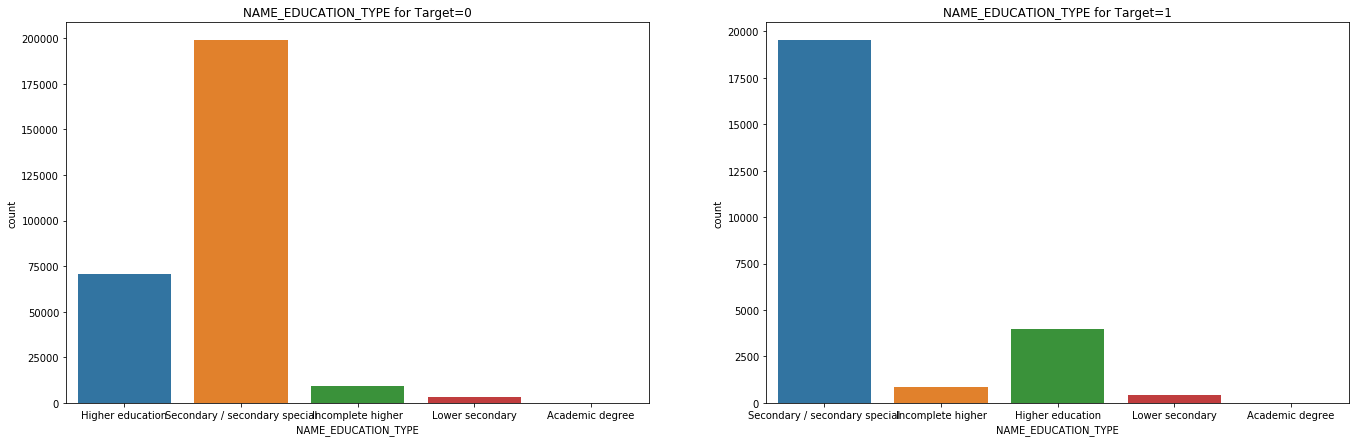

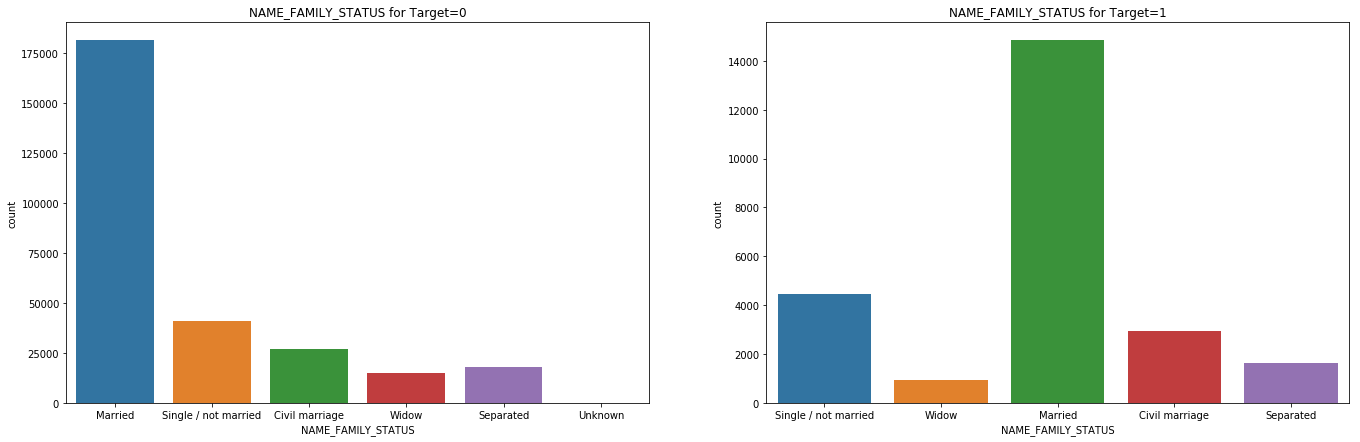

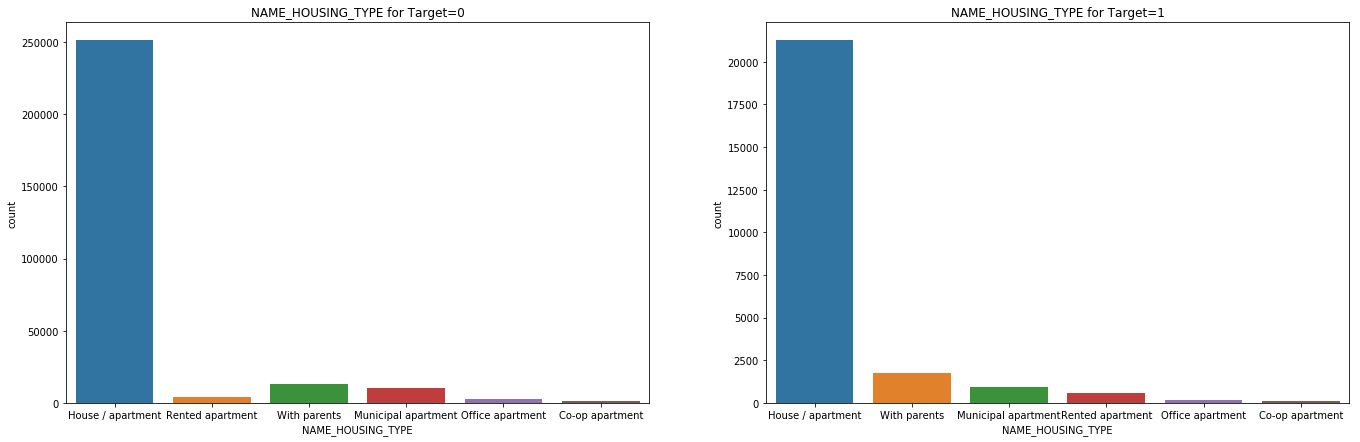

In [45]:
col = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE']
for i in col:
    plt.figure(figsize=(23,7))
    plt.subplot(1,2,1)
    sns.countplot(x=i,data=app_target0)
    plt.title(i+' for Target=0')
    plt.subplot(1,2,2)
    sns.countplot(x=i,data=app_target1)
    plt.title(i+' for Target=1')

Text(0.5, 1.0, 'ORGANIZATION_TYPE for Target=1')

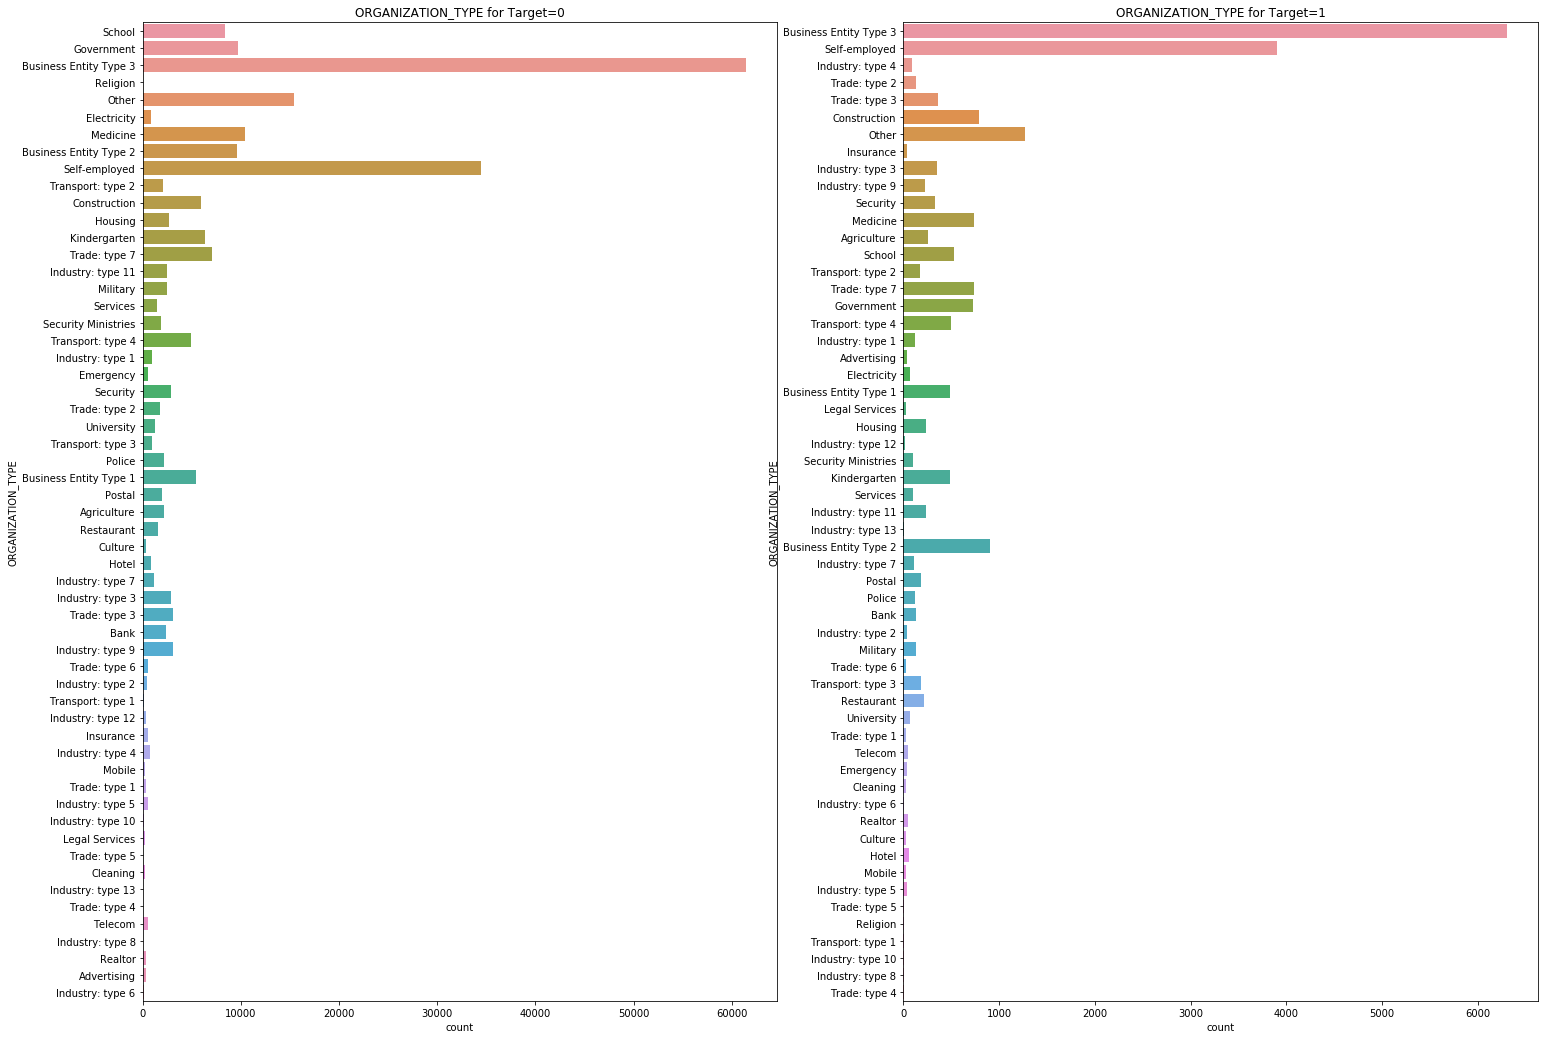

In [46]:
#Plotting a countplot for Organization_Type column
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
sns.countplot(y='ORGANIZATION_TYPE',data=app_target0)
plt.title('ORGANIZATION_TYPE for Target=0')
plt.subplot(1,2,2)
sns.countplot(y='ORGANIZATION_TYPE',data=app_target1)
plt.title('ORGANIZATION_TYPE for Target=1')

Majority of the defaulters are from Organization type 'Business_Entity_3' or are 'Self Employed'

Text(0.5, 1.0, 'OCCUPATION_TYPE for Target=1')

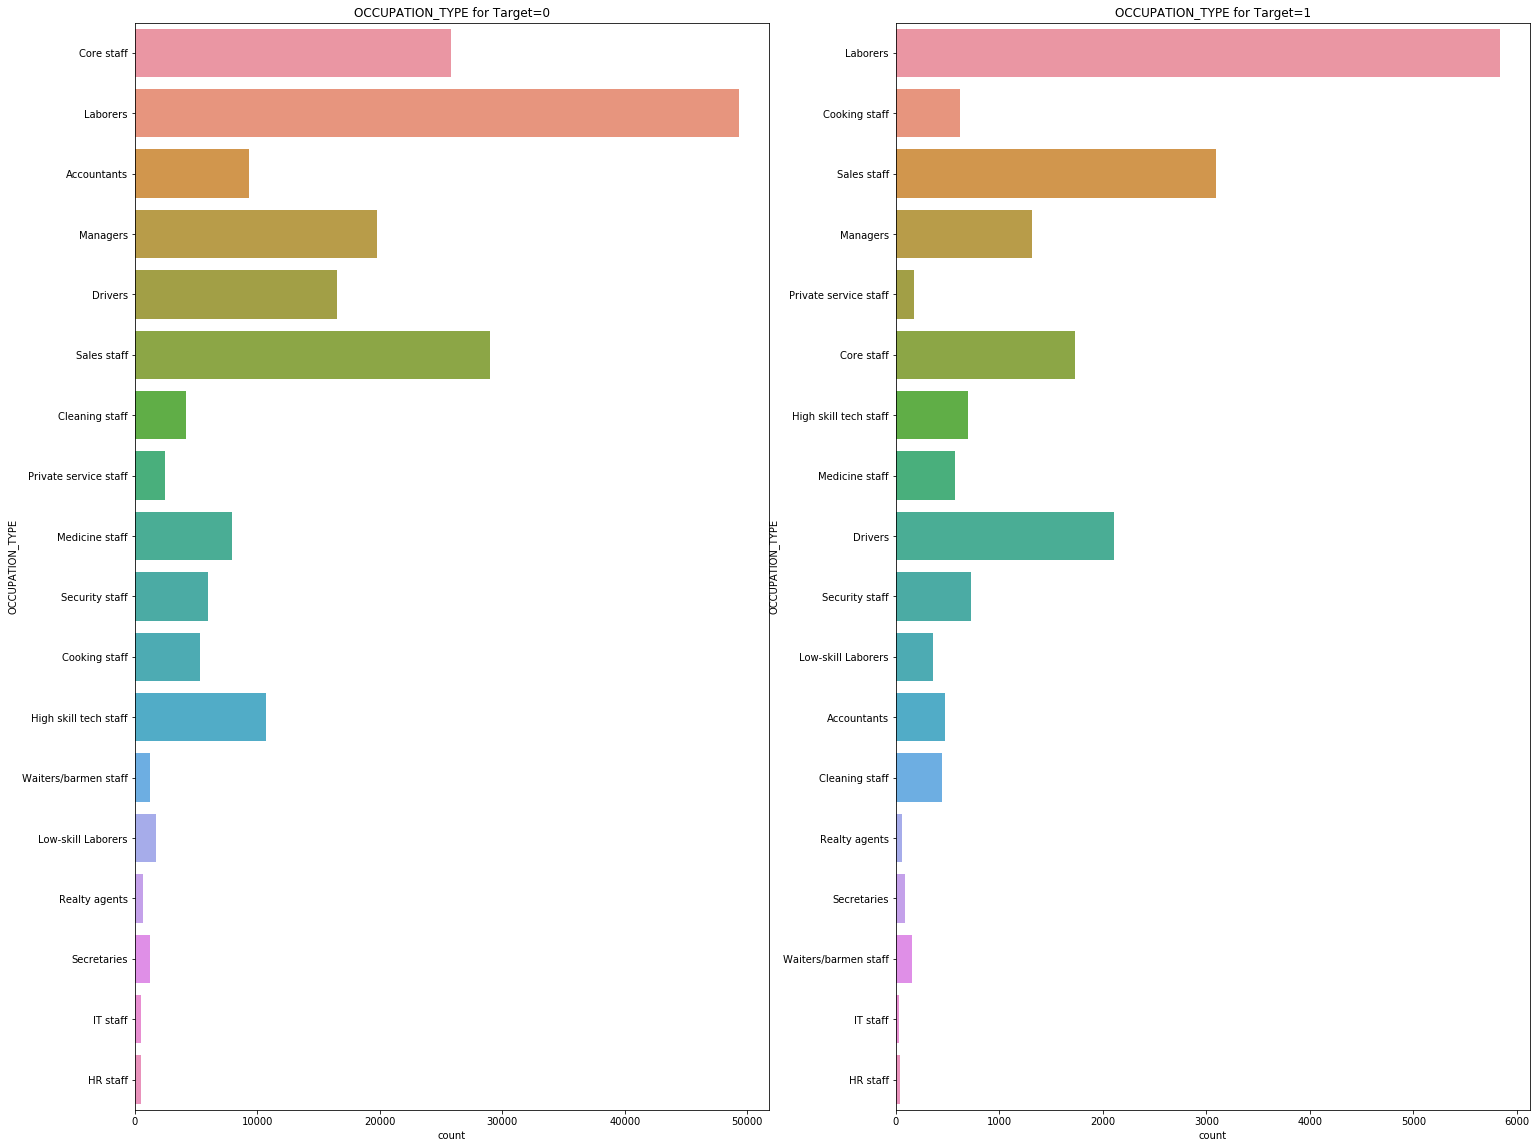

In [47]:
#Plotting a countplot for Occupation_Type column
plt.figure(figsize=(25,20))
plt.subplot(1,2,1)
sns.countplot(y='OCCUPATION_TYPE',data=app_target0)
plt.title('OCCUPATION_TYPE for Target=0')
plt.subplot(1,2,2)
sns.countplot(y='OCCUPATION_TYPE',data=app_target1)
plt.title('OCCUPATION_TYPE for Target=1')

From the above plots, we can infer that,
Majority of defaulters,
1. Don't own a car
2. Own a real estate property
3. Have 0 or 1 children
4. Their income type is 'Working'
5. Have secondary education
6. Are married
7. Live in a House or apartment.
8. Are from the Organization_type Business_Entity_3 and Self Employed
9. Are from Occupation_type Laborers, Sales Staff and Drivers

# Bivariate Analysis

Plotting a heat map with correlation values across various numerical variables

Text(0.5, 1.0, 'Correlation Matrix for Target=1')

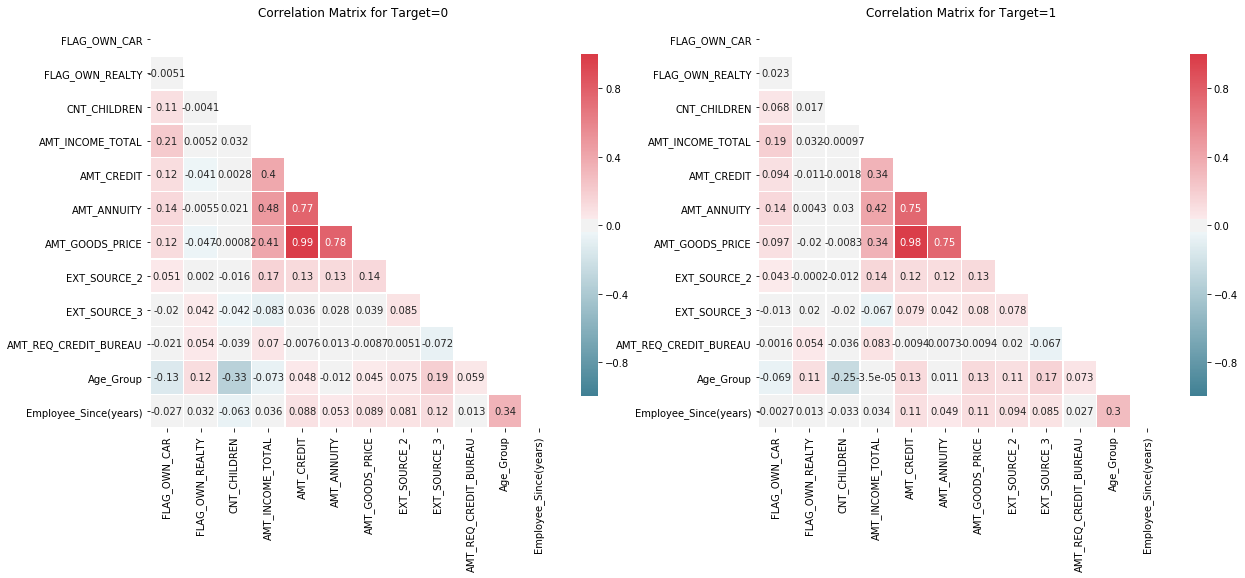

In [48]:
#Creating the correlation matrix using the corr() method.
corr_target0 = app_target0[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU','Age_Group','Employee_Since(years)']].corr()
plt.figure(figsize=(20, 9))
plt.subplot(1,2,1)
#masking the upper triangle of the correlation matrix
mask = np.zeros_like(corr_target0, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#apply desired color map so that heatmap is more intuitive
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_target0, mask=mask, cmap=cmap, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation Matrix for Target=0')

corr_target1 = app_target1[['FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
            'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU','Age_Group','Employee_Since(years)']].corr()
plt.subplot(1,2,2)
mask = np.zeros_like(corr_target1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_target1, mask=mask, cmap=cmap, vmin=-1,center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation Matrix for Target=1')

From the above correlation matrix heat map, we can see that the top 5 correlations are same for both Clients with payment difficulties and clients with no payment difficulties.
The top 10 correlations are,
        
               Correlations                 Target=0    Target=1
    1. AMT_GOODS_PRICE and AMT_CREDIT        (+0.99)     (+0.98)
    2. AMT_GOODS_PRICE and AMT_ANNUITY       (+0.78)     (+0.75)
    3. AMT_CREDIT and AMT_ANNUITY            (+0.77)     (+0.75)
    4. AMT_ANNUITY and AMT_INCOME_TOTAL      (+0.48)     (+0.42)
    5. AMT_GOODS_PRICE and AMT_INCOME_TOTAL  (+0.41)     (+0.35)
    6. AMT_CREDIT and AMT_INCOME_TOTAL       (+0.4)      (0.34)
    7. AGE_GROUP and Employee_Since(years)   (+0.34)     (+0.3)
    8. AGE_GROUP and CNT_CHILDREN            (-0.33)     (-0.25)
    9. AMT_INCOME_TOTAL and FLG_OWN_CAR      (+0.22)     (+0.19)
    10. AGE_GROUP and EXT_SOURCE_3           (+0.19)     (+0.17)

Lets see the trend line for the top three correlations

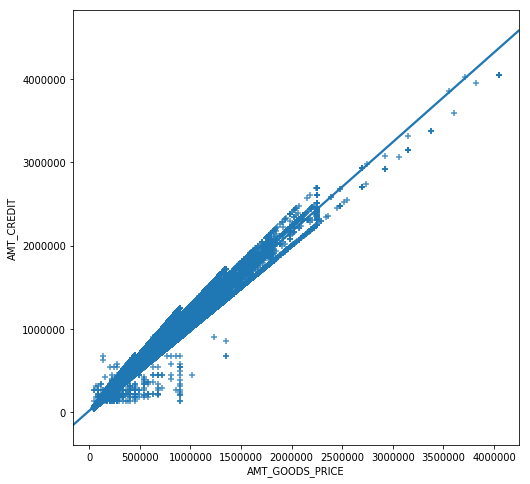

In [49]:
x,y = app_target0['AMT_GOODS_PRICE'],app_target0['AMT_CREDIT']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

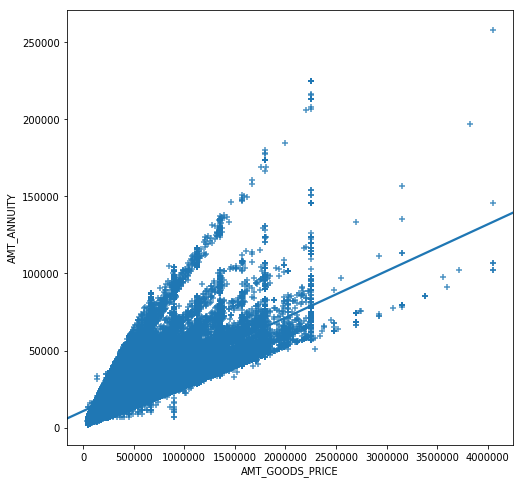

In [50]:
x,y = app_target0['AMT_GOODS_PRICE'],app_target0['AMT_ANNUITY']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

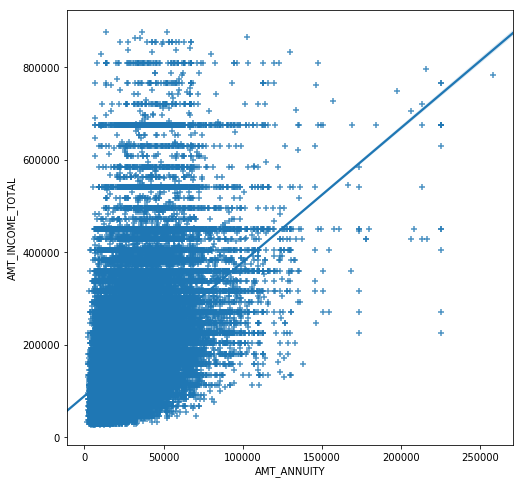

In [51]:
x,y = app_target0['AMT_ANNUITY'],app_target0['AMT_INCOME_TOTAL']
plt.figure(figsize=(8,8))
sns.regplot(x=x, y=y, marker='+')

# Importing the 'previous_application.csv'

In [52]:
#importing the previous_application.csv file into prev_app DataFrame
prev_app = pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Analysing the prev_app DataFrame

In [53]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [54]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


There are many columns with value 365243. It is being used instead of null values. Therefore, lets replace 365243 with null values.

In [55]:
#Replacing 365243, XNA and XAP values with null values.
prev_app.replace({365243:np.NaN, 'XNA':np.NaN,'XAP':np.NaN}, inplace=True)

Let's check the percentage null values

In [56]:
#columnwise percent null values
round(100*prev_app.isnull().sum()/prev_app.shape[0])

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE          96.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE               38.0
CODE_REJECT_REASON              81.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY             57.0
NAME_PORTFOLIO                  22.0
NAME_PRODUCT_TYPE               64.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

Lets remove the columns with more than 40% null values.

In [57]:
prev_app = prev_app.loc[:,(100 * prev_app.isnull().mean())<40]

Removing columns which are not important

In [58]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [59]:
#Creating a list 'col' in which we will add all the non required columns from prev_app
col = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
      'DAYS_DECISION','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','SELLERPLACE_AREA','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
#Dropping all the columns whose names were present in 'col'
prev_app = prev_app.drop(columns=col)

We need to merge the two DataFrames app_data and prev_app into one DataFrame, df by using inner join

In [60]:
#Merging app_data and prev_app using inner join
df = pd.merge(app_data, prev_app, how='inner', on=('SK_ID_CURR','SK_ID_CURR'))

In [61]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU,Age_Group,Employee_Since(years),INCOME_LEVEL,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS,NAME_PORTFOLIO,CHANNEL_TYPE
0,100002,1,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,0.262949,0.139376,1.0,2,2.0,MID,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,POS,Stone
1,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,0.622246,NaN,0.0,4,3.0,HIGH,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,Cash,Credit and cash offices
2,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,0.622246,NaN,0.0,4,3.0,HIGH,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,POS,Stone
3,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,Core staff,School,0.622246,NaN,0.0,4,3.0,HIGH,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,POS,Country-wide
4,100004,0,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,0.555912,0.729567,0.0,5,1.0,LOW,1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,Approved,POS,Regional / Local


In [62]:
df['NAME_CONTRACT_STATUS'].value_counts()

Approved        885252
Canceled        259237
Refused         245111
Unused offer     22755
Name: NAME_CONTRACT_STATUS, dtype: int64

Performing Univariate Analysis on the newly added variables for Target=0 and Target=1

In [75]:
tar0 = df[df['TARGET'] == 0]
tar1 = df[df['TARGET'] == 1]

Text(0.5, 1.0, 'For Target=1')

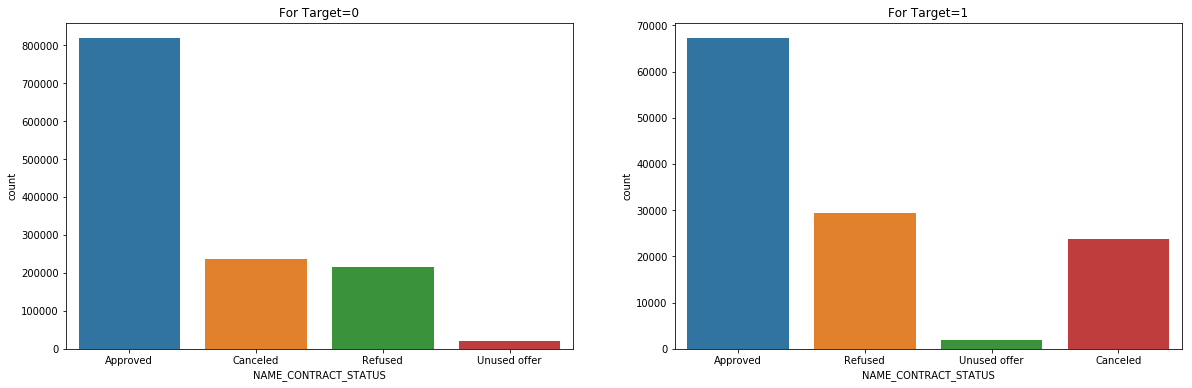

In [76]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_STATUS', data=tar0)
plt.title('For Target=0')
plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_STATUS',data=tar1)
plt.title('For Target=1')

Text(0.5, 1.0, 'For Target=1')

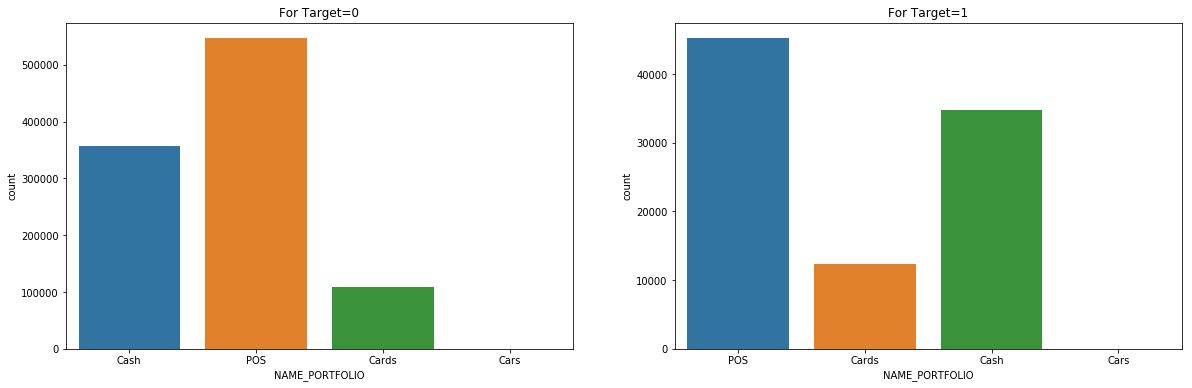

In [77]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x='NAME_PORTFOLIO', data=tar0)
plt.title('For Target=0')
plt.subplot(1,2,2)
sns.countplot(x='NAME_PORTFOLIO',data=tar1)
plt.title('For Target=1')

Text(0.5, 1.0, 'For Target=1')

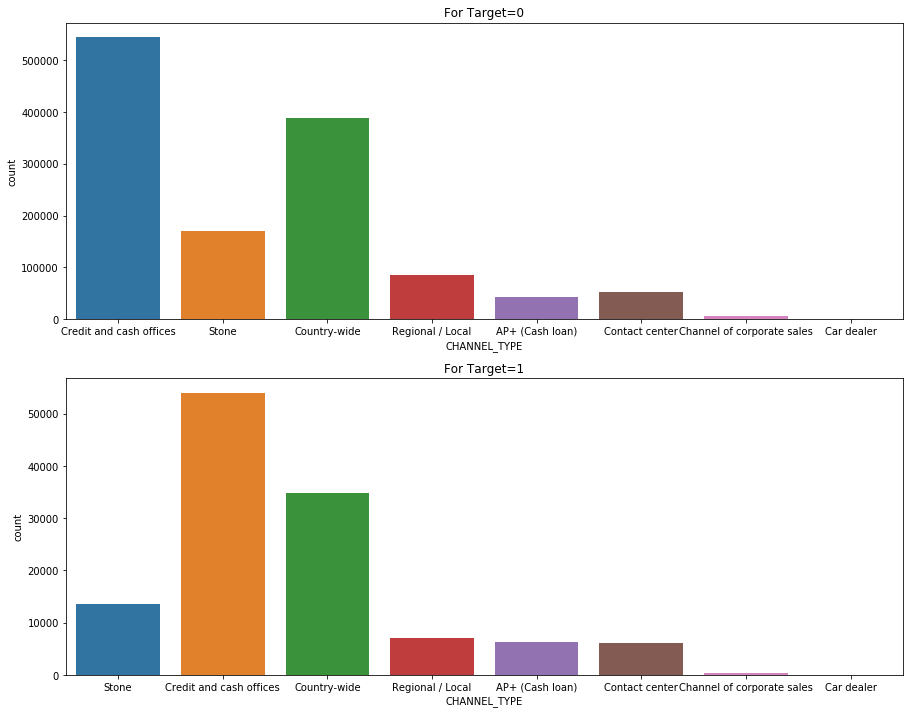

In [78]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
sns.countplot(x='CHANNEL_TYPE', data=tar0)
plt.title('For Target=0')
plt.subplot(2,1,2)
sns.countplot(x='CHANNEL_TYPE',data=tar1)
plt.title('For Target=1')

From the above 3 countplots, we can see that, the defaulters are most influenced by
1. Name_Portfolio = POS
2. Channel_Type = Credit and cash offices.

We will now look into some categorical variables only for the defaulters (Target=1). This is because we will have to see what facotrs led previous approved loan applicants to default on their payments.

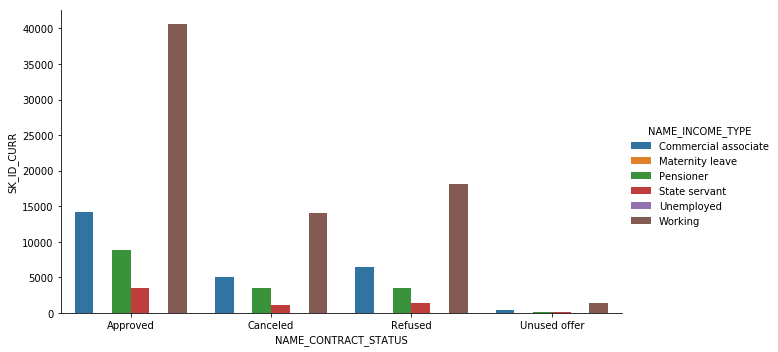

In [64]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_INCOME_TYPE' only for defaulting (Target=1) clients
piv = df[df['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_INCOME_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='NAME_INCOME_TYPE', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8)

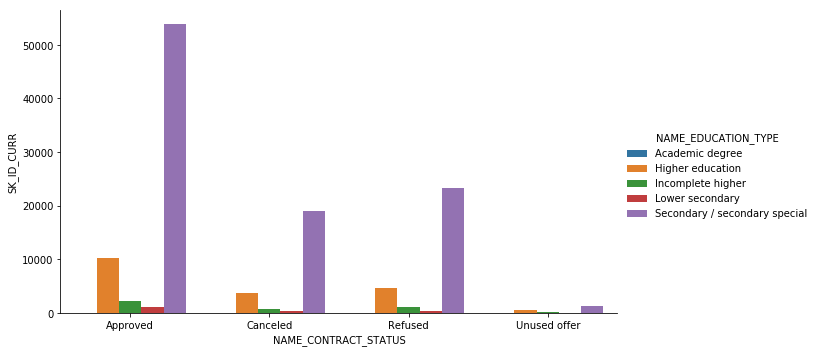

In [65]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_EDUCATION_TYPE'
piv = df[df['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_EDUCATION_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='NAME_EDUCATION_TYPE', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8)

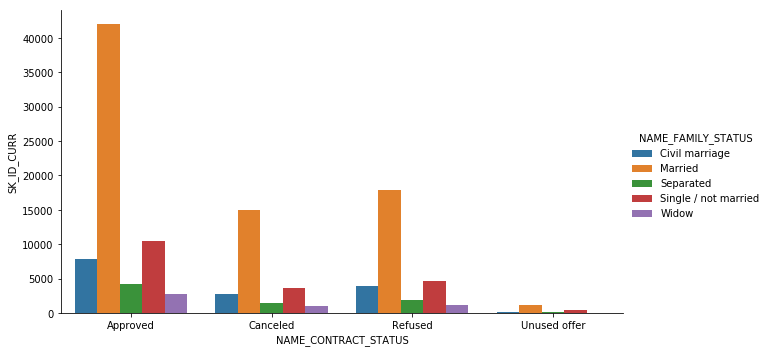

In [66]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','NAME_FAMILY_STATUS'
piv = df[df['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','NAME_FAMILY_STATUS'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='NAME_FAMILY_STATUS', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8)

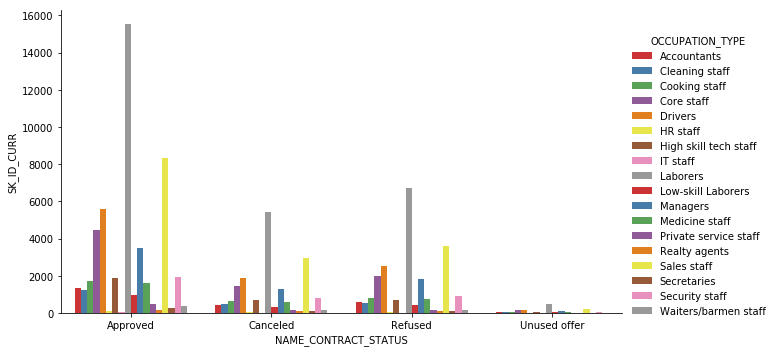

In [67]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','OCCUPATION_TYPE'
piv = df[df['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','OCCUPATION_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='OCCUPATION_TYPE', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8,palette='Set1')

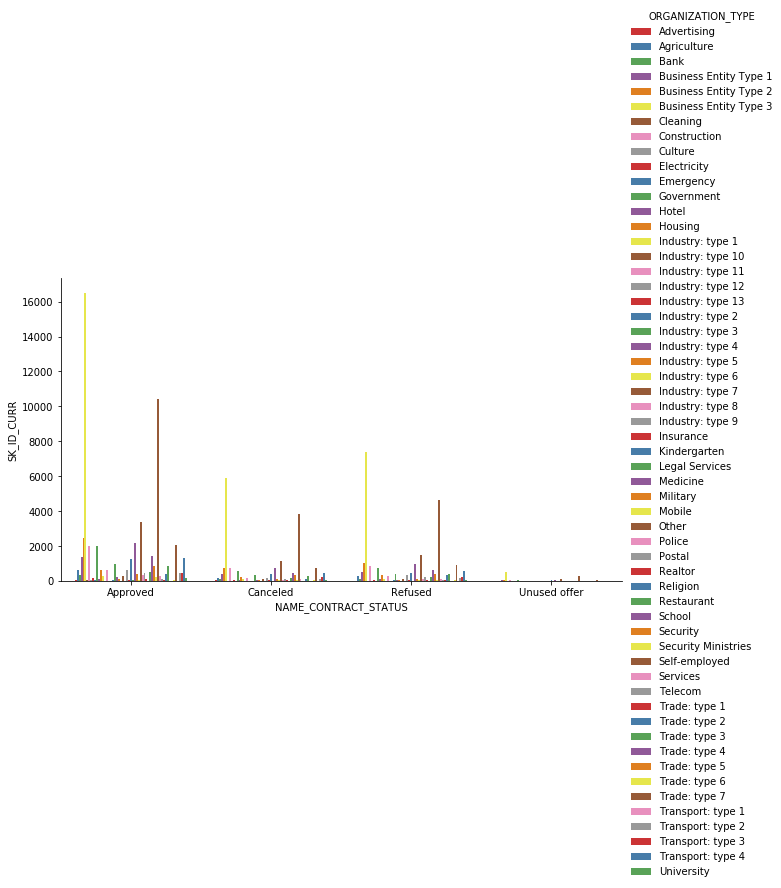

In [68]:
#Creating a pivot table so that we can plot a bar plot for 'NAME_CONTRACT_STATUS','TARGET','ORGANIZATION_TYPE'
piv = df[df['TARGET']==1].pivot_table(index=['NAME_CONTRACT_STATUS','TARGET','ORGANIZATION_TYPE'],values='SK_ID_CURR',aggfunc='count').reset_index()
#Using catplot to plot the bar plot with hue
sns.catplot(x='NAME_CONTRACT_STATUS', hue='ORGANIZATION_TYPE', y='SK_ID_CURR',data=piv,kind='bar',aspect=1.8, palette='Set1')

From the above plots, people whose loans were approved in the past but are defaulters now are most influenced by these characteristics,
1. Client is Working or Commercial_Associate
2. Client has Secondary_Education.
3. Client is Married
4. occupation is Laborer or Sales Staff or Realty agent.
5. Organization type is Industry type 1 or Self Employed.

Conclusion
1. Ext_Source_2 and Ext_Source_3 are pretty good variables to consider to predict defaulters.
2. Clients in the age group of 40s are most likely to default on their loans.
3. People with secondary education are most likely to default on their loans.
4. Married people are most likely to default on their loans.
5. CLients from organization type Business_Entity_3, Industry_Type 1,Commercial Associate and Self Employed are most likely to default on their loans.
6. Clients with Occupation such as Laborers, Sales Staff, Realty Agent or drivers are most likely to default on their loans.
7. 